In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('~/Skillfactory/SF_classes/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
for col in df.columns:
    print(col, ': ', df[col].nunique(), sep='')

Car_Name: 98
Year: 16
Selling_Price: 156
Present_Price: 147
Kms_Driven: 206
Fuel_Type: 3
Seller_Type: 2
Transmission: 2
Owner: 3


In [7]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
df['is_petrol'] = (df['Fuel_Type'] == 'Petrol').astype(int)
df['is_diesel'] = (df['Fuel_Type'] == 'Diesel').astype(int)

In [9]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,is_petrol,is_diesel
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0,1


In [11]:
df['is_dealer'] = (df['Seller_Type'] == 'Dealer').astype(int)

In [12]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [13]:
df['is_manual'] = (df['Transmission'] == 'Manual').astype(int)

In [14]:
df.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

In [15]:
df['Year'].min()

2003

In [16]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,is_petrol,is_diesel,is_dealer,is_manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-0.059959,0.064315,0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.540571,0.552339,0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,-0.465244,0.473306,0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,-0.172874,0.172515,0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.055687,-0.053469,-0.124269,-0.050316
is_petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,1.000000,-0.979648,-0.358321,0.091013
is_diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.979648,1.000000,0.350467,-0.098643
is_dealer,0.039896,0.550724,0.512030,0.101419,-0.124269,-0.358321,0.350467,1.000000,-0.063240
is_manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,0.091013,-0.098643,-0.063240,1.000000


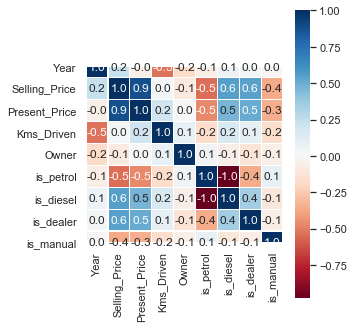

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()
plt.savefig('car_corr.png')

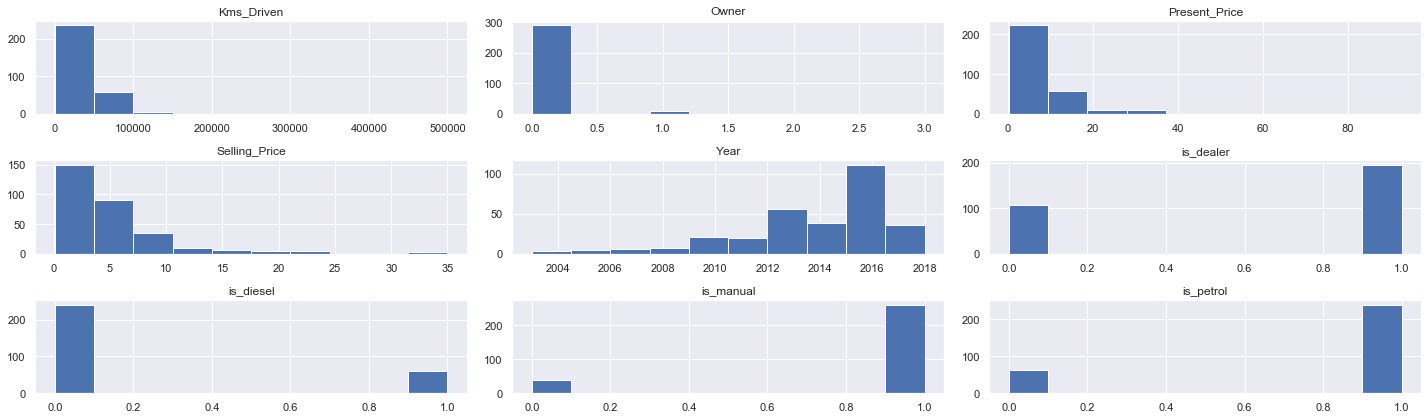

In [18]:
df.hist(figsize=(20, 6));
plt.tight_layout()

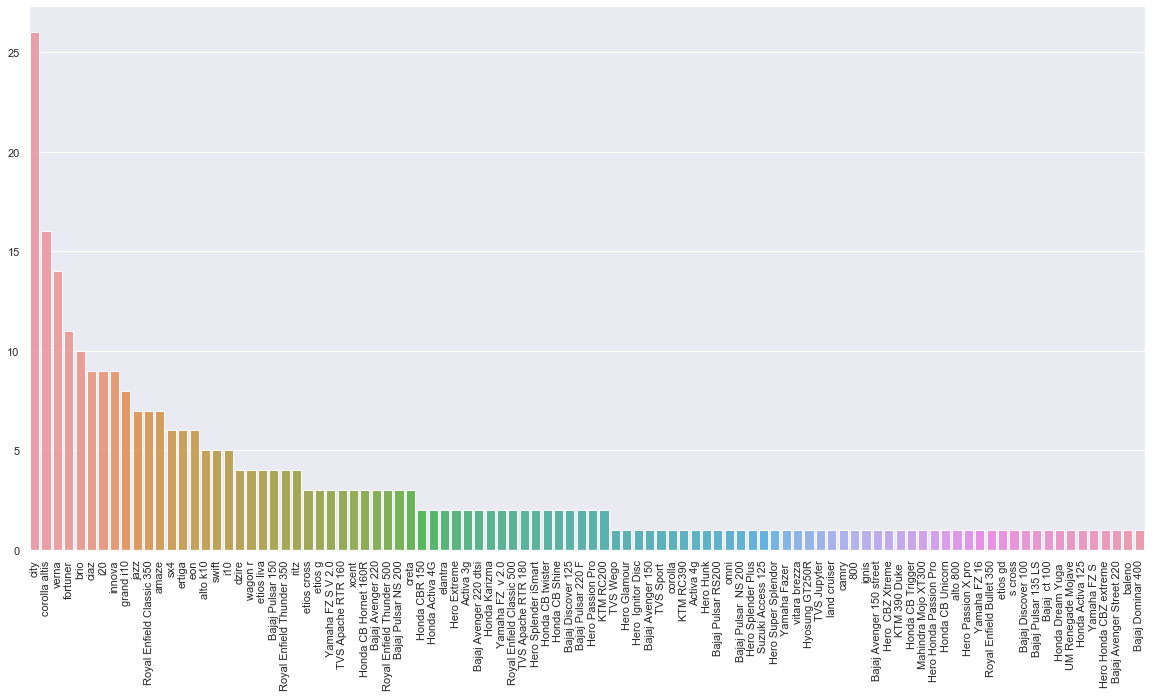

In [19]:
car_type = df['Car_Name'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(car_type.index, car_type.values, alpha=0.9);
plt.xticks(rotation=90);

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
old_df = df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder

df['Car_Name'] = df['Car_Name'].astype('category')
encoder = LabelEncoder()
df['Car_Name'] = encoder.fit_transform(df['Car_Name'])

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,is_petrol,is_diesel,is_dealer,is_manual
0,90,2014,3.35,5.59,27000,0,1,0,1,1
1,93,2013,4.75,9.54,43000,0,0,1,1,1
2,68,2017,7.25,9.85,6900,0,1,0,1,1
3,96,2011,2.85,4.15,5200,0,1,0,1,1
4,92,2014,4.60,6.87,42450,0,0,1,1,1


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler

to_scale = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Name']
scaler = MinMaxScaler()
X_train.loc[:, to_scale] = scaler.fit_transform(X_train[to_scale])
X_test.loc[:, to_scale] = scaler.transform(X_test[to_scale])

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'RMSE = {rmse:.2f}, MAE = {mae:.2f}, R-sq = {r2:.2f}')

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print_regression_metrics(y_test, y_pred)

RMSE = 1.88, MAE = 1.27, R-sq = 0.88


In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg = Ridge()
param_grid_ = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
grid_ridge = GridSearchCV(estimator=reg, param_grid=param_grid_, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

{'alpha': 0.01}

In [29]:
reg = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = reg.predict(X_test)
print_regression_metrics(y_test, y_pred)

RMSE = 1.89, MAE = 1.27, R-sq = 0.87
